# Libraries and Configurations

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as L
import tensorflow_addons as tfa
import glob, random, os, warnings
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.model_selection import train_test_split
import random

# Tensorflow Libraries
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout,GlobalAveragePooling2D
from tensorflow.keras.callbacks import Callback, EarlyStopping,ModelCheckpoint
from tensorflow.keras import Model
import tensorflow_addons as tfa
# System libraries
from pathlib import Path
import os.path
import os
print('TensorFlow Version ' + tf.__version__)

def seed_everything(seed = 0):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'

seed_everything()

import warnings
warnings.filterwarnings("ignore")

TensorFlow Version 2.6.4


In [2]:
usedClass = [
 'Apple__black_rot',
 'Apple__healthy',
 'Apple__rust',
 'Apple__scab',
#  'Cassava__bacterial_blight',
#  'Cassava__brown_streak_disease',
#  'Cassava__green_mottle',
#  'Cassava__healthy',
#  'Cassava__mosaic_disease',
#  'Cherry__healthy',
#  'Cherry__powdery_mildew',
 'Chili__healthy',
 'Chili__leaf curl',
 'Chili__leaf spot',
 'Chili__whitefly',
 'Chili__yellowish',
#  'Coffee__cercospora_leaf_spot',
#  'Coffee__healthy',
#  'Coffee__red_spider_mite',
#  'Coffee__rust',
 'Corn__common_rust',
 'Corn__gray_leaf_spot',
 'Corn__healthy',
 'Corn__northern_leaf_blight',
 'Cucumber__diseased',
 'Cucumber__healthy',
 'Gauva__diseased',
 'Gauva__healthy',
 'Grape__black_measles',
 'Grape__black_rot',
 'Grape__healthy',
 'Grape__leaf_blight_(isariopsis_leaf_spot)',
#  'Jamun__diseased',
#  'Jamun__healthy',
 'Lemon__diseased',
 'Lemon__healthy',
 'Mango__diseased',
 'Mango__healthy',
#  'Peach__bacterial_spot',
#  'Peach__healthy',
 'Pepper_bell__bacterial_spot',
 'Pepper_bell__healthy',
#  'Pomegranate__diseased',
#  'Pomegranate__healthy',
 'Potato__early_blight',
 'Potato__healthy',
 'Potato__late_blight',
 'Rice__brown_spot',
 'Rice__healthy',
 'Rice__hispa',
 'Rice__leaf_blast',
 'Rice__neck_blast',
 'Soybean__bacterial_blight',
 'Soybean__caterpillar',
 'Soybean__diabrotica_speciosa',
 'Soybean__downy_mildew',
 'Soybean__healthy',
 'Soybean__mosaic_virus',
 'Soybean__powdery_mildew',
 'Soybean__rust',
 'Soybean__southern_blight',
#  'Strawberry___leaf_scorch',
#  'Strawberry__healthy',
 'Sugarcane__bacterial_blight',
 'Sugarcane__healthy',
 'Sugarcane__red_rot',
 'Sugarcane__red_stripe',
 'Sugarcane__rust',
#  'Tea__algal_leaf',
#  'Tea__anthracnose',
#  'Tea__bird_eye_spot',
#  'Tea__brown_blight',
#  'Tea__healthy',
#  'Tea__red_leaf_spot',
 'Tomato__bacterial_spot',
 'Tomato__early_blight',
 'Tomato__healthy',
 'Tomato__late_blight',
 'Tomato__leaf_mold',
 'Tomato__mosaic_virus',
 'Tomato__septoria_leaf_spot',
 'Tomato__spider_mites_(two_spotted_spider_mite)',
 'Tomato__target_spot',
 'Tomato__yellow_leaf_curl_virus',
 'Wheat__brown_rust',
 'Wheat__healthy',
 'Wheat__septoria',
 'Wheat__yellow_rust']

In [3]:
IMAGE_SIZE = 224
BATCH_SIZE = 32
n_classes = len(usedClass)
EPOCHS = 5

path = '/kaggle/input/plant-disease-classification-merged-dataset'

classes = {i:j for i,j in enumerate(usedClass)}
classes

{0: 'Apple__black_rot',
 1: 'Apple__healthy',
 2: 'Apple__rust',
 3: 'Apple__scab',
 4: 'Chili__healthy',
 5: 'Chili__leaf curl',
 6: 'Chili__leaf spot',
 7: 'Chili__whitefly',
 8: 'Chili__yellowish',
 9: 'Corn__common_rust',
 10: 'Corn__gray_leaf_spot',
 11: 'Corn__healthy',
 12: 'Corn__northern_leaf_blight',
 13: 'Cucumber__diseased',
 14: 'Cucumber__healthy',
 15: 'Gauva__diseased',
 16: 'Gauva__healthy',
 17: 'Grape__black_measles',
 18: 'Grape__black_rot',
 19: 'Grape__healthy',
 20: 'Grape__leaf_blight_(isariopsis_leaf_spot)',
 21: 'Lemon__diseased',
 22: 'Lemon__healthy',
 23: 'Mango__diseased',
 24: 'Mango__healthy',
 25: 'Pepper_bell__bacterial_spot',
 26: 'Pepper_bell__healthy',
 27: 'Potato__early_blight',
 28: 'Potato__healthy',
 29: 'Potato__late_blight',
 30: 'Rice__brown_spot',
 31: 'Rice__healthy',
 32: 'Rice__hispa',
 33: 'Rice__leaf_blast',
 34: 'Rice__neck_blast',
 35: 'Soybean__bacterial_blight',
 36: 'Soybean__caterpillar',
 37: 'Soybean__diabrotica_speciosa',
 38:

In [4]:
image_dir = Path(path)

# Get filepaths and labels
filepaths = list(image_dir.glob(r'**/*.JPG')) + list(image_dir.glob(r'**/*.jpg')) + list(image_dir.glob(r'**/*.PNG')) + list(image_dir.glob(r'**/*.png'))

labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)
print(image_df.Filepath[0])

/kaggle/input/plant-disease-classification-merged-dataset/Tomato__septoria_leaf_spot/8854cb53-e283-46b4-b150-3d0b414b77fd___Matt.S_CG 0951.JPG


In [5]:
labels_to_filter = usedClass
image_df = image_df[image_df['Label'].isin(labels_to_filter)]

In [6]:
image_df = image_df.reset_index()

# Data Generator

In [7]:
train_df, test_df = train_test_split(image_df, test_size=0.2,stratify=image_df['Label'], random_state=42)
train_df, val_df = train_test_split(image_df, test_size=0.2,stratify=image_df['Label'], random_state=42)

In [8]:
import tensorflow as tf

# Define the augmentations for training
train_augmentations = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomContrast(0.2),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Normalization()
])

# Define the augmentations for validation (minimal augmentations)
val_augmentations = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Normalization()
])

# Define the augmentations for test (minimal augmentations)
test_augmentations = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Normalization()
])

# Create the training data generator
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    dtype='float32',
    preprocessing_function=train_augmentations,
)

# Create the validation data generator
val_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    dtype='float32',
    preprocessing_function=val_augmentations,
)

# Create the test data generator
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    dtype='float32',
    preprocessing_function=test_augmentations,
)

In [9]:
train_gen = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=True,
    seed=42
)

val_gen = val_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False,
    seed=42
)

test_gen = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False
)

Found 52840 validated image filenames belonging to 63 classes.
Found 13210 validated image filenames belonging to 63 classes.
Found 13210 validated image filenames belonging to 63 classes.


# Sample Image Visualization

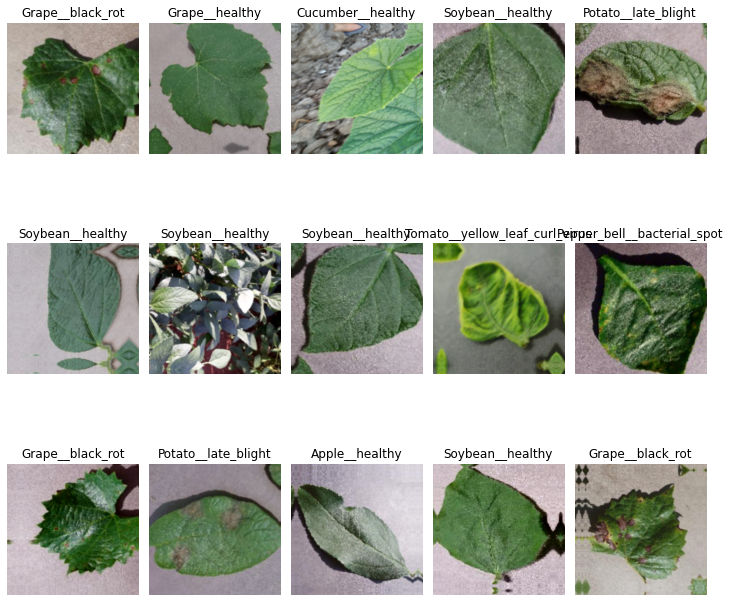

In [10]:
warnings.filterwarnings("ignore")

images = [train_gen[0][0][i] for i in range(16)]
labels = [train_gen[0][1][i] for i in range(16)]
fig, axes = plt.subplots(3, 5, figsize = (10, 10))

axes = axes.flatten()

for img,label, ax in zip(images,labels, axes):
    ax.imshow(img)
    ax.set_title(classes[int(tf.math.argmax(label))])
    ax.axis('off')

plt.tight_layout()
plt.show()

# Building the Model

In [11]:
# Create checkpoint callback
checkpoint_path = "plant_disease_detection_model_checkpoint_{epoch:02d}.keras"
checkpoint_callback = ModelCheckpoint(checkpoint_path,
                                      save_weights_only=False,
                                      monitor="val_accuracy",
                                      save_best_only=True)

In [12]:
# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
early_stopping = EarlyStopping(monitor = "val_loss", # watch the val loss metric
                               patience = 4,
                               restore_best_weights = True) # if val loss decreases for 3 epochs in a row, stop training

In [13]:
!pip install vit_keras

  Preparing metadata (setup.py) ... - done
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19582 sha256=ce3898188ecd01e63f89b9940ef745a773e4d0c97af95448a951e143b4e6aa17
  Stored in directory: /root/.cache/pip/wheels/5f/55/ab/36a76989f7f88d9ca7b1f68da6d94252bb6a8d6ad4f18e04e9
Successfully built validators


# 1 - ViT B16 Model

In [14]:
from vit_keras import vit

vit_model = vit.vit_b16(
        image_size = IMAGE_SIZE,
        activation = 'softmax',
        pretrained = True,
        include_top = False,
        pretrained_top = False)

347512832/347502902 [==============================] - 2s 0us/step


In [15]:
class Patches(L.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images = images,
            sizes = [1, self.patch_size, self.patch_size, 1],
            strides = [1, self.patch_size, self.patch_size, 1],
            rates = [1, 1, 1, 1],
            padding = 'VALID',
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

## Visualizing Attention Maps of Sample Test Image

Image size: 224 X 224
Patch size: 7 X 7
Patches per image: 1024
Elements per patch: 147


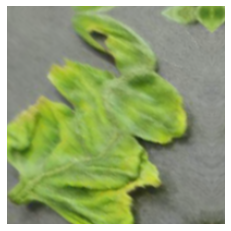

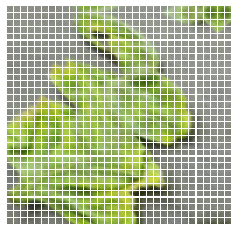

In [16]:
plt.figure(figsize=(4, 4))
batch_size = 16
patch_size = 7  # Size of the patches to be extract from the input images
num_patches = (IMAGE_SIZE // patch_size) ** 2

x = train_gen.next()
image = x[0][0]

plt.imshow(image)
plt.axis('off')

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size = (IMAGE_SIZE, IMAGE_SIZE)
)

patches = Patches(patch_size)(resized_image)
print(f'Image size: {IMAGE_SIZE} X {IMAGE_SIZE}')
print(f'Patch size: {patch_size} X {patch_size}')
print(f'Patches per image: {patches.shape[1]}')
print(f'Elements per patch: {patches.shape[-1]}')

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))

for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy())
    plt.axis('off')

## ViT Model Architecture

In [17]:
model = tf.keras.Sequential([
        vit_model,
        tf.keras.layers.Flatten(),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(256, activation = tfa.activations.gelu),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(128, activation = tfa.activations.gelu),
        tf.keras.layers.Dense(len(usedClass), 'softmax')
    ],
    name = 'vision_transformer')

model.summary()

Model: "vision_transformer"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vit-b16 (Functional)         (None, 768)               85798656  
_________________________________________________________________
flatten (Flatten)            (None, 768)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 768)               3072      
_________________________________________________________________
dense (Dense)                (None, 256)               196864    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 63)         

## Training the Model

In [18]:
warnings.filterwarnings("ignore")
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy',tfa.metrics.F1Score(num_classes=len(usedClass))])

STEP_SIZE_TRAIN = train_gen.n // train_gen.batch_size
STEP_SIZE_VALID = val_gen.n // val_gen.batch_size

model.fit(x = train_gen,
          steps_per_epoch = STEP_SIZE_TRAIN,
          validation_data = val_gen,
          validation_steps = STEP_SIZE_VALID,
          epochs = EPOCHS,
          callbacks=[
              early_stopping,
              checkpoint_callback,
          ],
          verbose=1)

Epoch 1/5
1651/1651 [==============================] - 5406s 3s/step - loss: 1.3542 - accuracy: 0.6105 - f1_score: 0.3991 - val_loss: 1.1033 - val_accuracy: 0.6729 - val_f1_score: 0.4869
Epoch 2/5
1651/1651 [==============================] - 4465s 3s/step - loss: 0.6688 - accuracy: 0.7831 - f1_score: 0.5973 - val_loss: 0.5583 - val_accuracy: 0.8221 - val_f1_score: 0.6236
Epoch 3/5
1651/1651 [==============================] - 4460s 3s/step - loss: 0.5394 - accuracy: 0.8245 - f1_score: 0.6603 - val_loss: 0.6435 - val_accuracy: 0.7996 - val_f1_score: 0.5886
Epoch 4/5
1651/1651 [==============================] - 4442s 3s/step - loss: 0.4658 - accuracy: 0.8470 - f1_score: 0.6923 - val_loss: 0.6413 - val_accuracy: 0.8029 - val_f1_score: 0.5986
Epoch 5/5
1651/1651 [==============================] - 4456s 3s/step - loss: 0.4233 - accuracy: 0.8594 - f1_score: 0.7124 - val_loss: 0.4442 - val_accuracy: 0.8549 - val_f1_score: 0.6788


In [19]:
# Save The Model
model.save('plant_diseases_detection_final_model.keras')

In [20]:
!pip freeze > requirements.txt

In [21]:
from IPython.display import FileLink
FileLink(r'/kaggle/working/plant_diseases_detection_final_model.keras')

/kaggle/working/plant_diseases_detection_final_model.keras

## ViT Model Result

              precision    recall  f1-score   support

           0       0.86      0.96      0.90       124
           1       0.93      0.97      0.95       330
           2       0.70      0.56      0.62        71
           3       0.67      0.86      0.76       140
           4       0.55      0.55      0.55        20
           5       0.33      0.05      0.09        20
           6       0.33      0.05      0.09        20
           7       0.50      0.05      0.09        20
           8       0.64      0.35      0.45        20
           9       0.92      0.93      0.93       262
          10       0.75      0.78      0.77       219
          11       0.96      1.00      0.98       232
          12       0.48      0.91      0.63       245
          13       0.74      0.90      0.81        70
          14       0.87      0.68      0.76        68
          15       0.78      0.75      0.76        28
          16       0.93      0.95      0.94        55
          17       0.80    

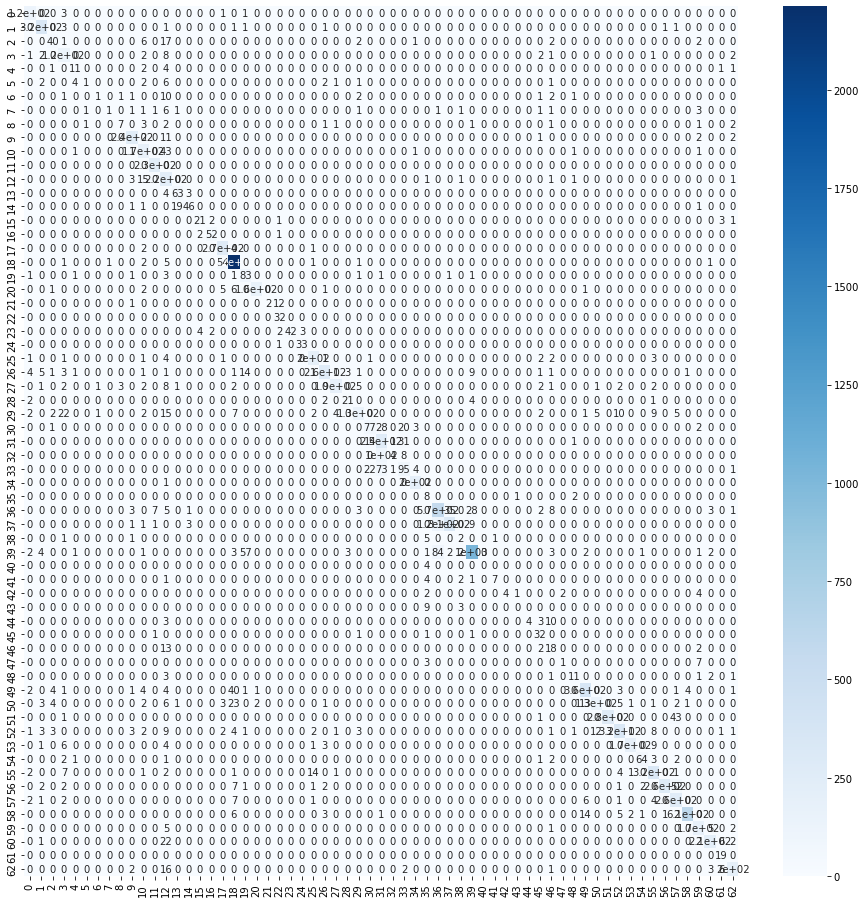

In [22]:
predicted_classes = np.argmax(model.predict(test_gen, steps = test_gen.n // test_gen.batch_size + 1), axis = 1)
true_classes = test_gen.classes
class_labels = list(test_gen.class_indices.keys())  

confusionmatrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize = (16, 16))
sns.heatmap(confusionmatrix, cmap = 'Blues', annot = True, cbar = True)

print(classification_report(true_classes, predicted_classes))